## This notebook solves the Huggett (1996) model using Dolo.

In [1]:
# importing packages
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

. To use SymEngine call Pkg.add("SymEngine")


In [42]:
# get the model file
filename=("Huggett1996.yaml")

"Huggett1996.yaml"

In [43]:
model=Dolo.yaml_import(filename)

Model 


MethodError: MethodError: no method matching sanitize(::Expr, ::Dolo.Model{Symbol("##383")})[0m
Closest candidates are:
  sanitize(::Expr, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:14
  sanitize(::Any, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:3
  sanitize(::Any, [1m[31m::Dolo.SModel{ID}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:32[0m

In [25]:
# simulate the Markov Chain (exogenous process) for N simulations each with T periods
N=50 # number of simulations
T=100 # time period

# NOTE: states that are multiples of 9 correspond to being dead
# simulation (essentially just drawing N*T realizations of the random variable)
sim_mc=Dolo.simulate(model.exogenous,N,T,1) # 1 is the initial point

2-dimensional AxisArray{Int64,2,...} with axes:
    :T, 1:100
    :N, 1:50
And data, a 100×50 Array{Int64,2}:
  1   1   1   1   1   1   1   1   1  …   1   1   1   1   1   1   1   1   1
 11   2   2  11  11   2   2  11  11     11   2   2   2   2   2   2   2   2
 12  12   3  21  21   3  12  12  12     12   3  12   3  12   3  12  12   3
 13  13  13  22  31   4  13  13  22     13   4  13   4  13   4  22  13   4
 14  18  23  23  32   5  23  14  23     14   5  14   5  14   5  23  23  14
 15  18  15  24  33   6  24  15  24  …  15   6  15   6  15  15  24  24  15
 25  18  16  25  34  16  25  18  25     16  16  25   7  16  25  25  16  16
 26   9  17  26  26  17  26  18  26     17  17  26  17  26  26  35  26   8
 18   9  27  27  27  27  27  18  27     27  18  27  18  18  36  27  27   9
 18   9  27  27  27  27  27  27  36     27  18  27  27  18  45  27  27   9
 18  18  27  27  27  36  27  36  36  …  36  18  27  27  18  45  27  27   9
 27  18  27  27  27  27  27  36  45     36  27  27  36  18  45  2

In [44]:
@time sol=Dolo.time_iteration(model,verbose=true, maxit=1000, details=true)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=200, details=true)

It    SA          gain        nit  
-----------------------------------
0     1.00e+04    NaN         0    
1     1.70e+01    1.70e-03    4    
2     1.61e+01    9.49e-01    10   
3     6.72e+01    4.17e+00    10   
4     8.99e+02    1.34e+01    10   
5     8.83e+02    9.82e-01    10   
6     1.76e+01    1.99e-02    10   
7     3.87e+01    2.20e+00    10   
8     3.05e+01    7.89e-01    10   
9     1.95e+01    6.41e-01    10   
10    9.32e+02    4.77e+01    10   
11    9.23e+02    9.91e-01    10   
12    6.65e+01    7.21e-02    10   
13    1.45e+01    2.18e-01    10   
14    7.32e-01    5.04e-02    4    
15    4.05e-02    5.53e-02    2    
16    0.00e+00    0.00e+00    0    
 31.627876 seconds (342.01 M allocations: 30.989 GB, 12.27% gc time)
It    SA          gain        nit  
-----------------------------------
0     1.00e+04    NaN         0    
1     0.00e+00    0.00e+00    0    
  0.883999 seconds (1.81 M allocations: 143.210 MB, 2.96% gc time)


Results of Time Iteration Algorithm
 * Complementarities: true
 * Decision Rule type: Dolo.TimeIterationResult
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-08: true


In [46]:
drtab = Dolo.tabulate(model, dr, :s) 
s0 = model.calibration[:states]
dr_y1 = Dolo.tabulate(model, dr, :s, s0, 1); # lowest income value  -age 1
dr_y2 = Dolo.tabulate(model, dr, :s, s0, 10); # second income value  -age 1
dr_y3 = Dolo.tabulate(model, dr, :s, s0, 19); # third income value  -age 1
dr_y4 = Dolo.tabulate(model, dr, :s, s0, 28);# fourth income value  -age 1
dr_y5 = Dolo.tabulate(model, dr, :s, s0, 37); # fifth income value  -age 1

r=0.002
ygrid=[-0.0968141 -0.0580885 -0.0193628 0.0193628 0.0580885 0.0968141]

c_y1=exp(ygrid[1])+dr_y1[:s]*r-dr_y1[Axis{:V}(:a)];
c_y2=exp(ygrid[2])+dr_y2[:s]*r-dr_y2[Axis{:V}(:a)];
c_y3=exp(ygrid[3])+dr_y3[:s]*r-dr_y3[Axis{:V}(:a)];
c_y4=exp(ygrid[4])+dr_y4[:s]*r-dr_y4[Axis{:V}(:a)];
c_y5=exp(ygrid[5])+dr_y4[:s]*r-dr_y5[Axis{:V}(:a)];

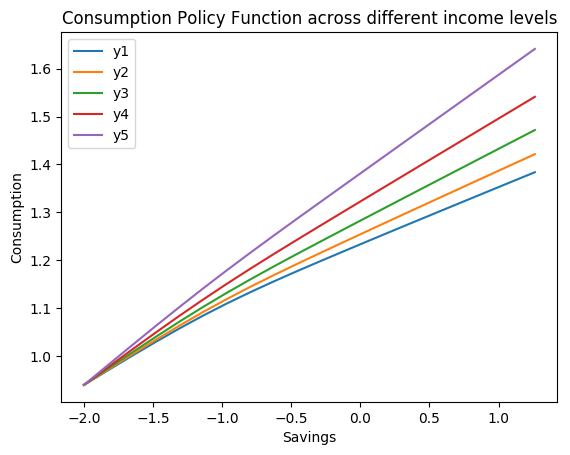

PyObject <matplotlib.text.Text object at 0x000000002BA5EF60>

In [52]:
# Plot the consumption policy function across different income levels for age 1
import PyPlot
plt=PyPlot
end_y=20

plt.plot(dr_y1[Axis{:V}(:s)][1:end_y],c_y1[1:end_y], label="y1")
plt.plot(dr_y2[Axis{:V}(:s)][1:end_y],c_y2[1:end_y], label="y2")
plt.plot(dr_y3[Axis{:V}(:s)][1:end_y],c_y3[1:end_y], label="y3")
plt.plot(dr_y4[Axis{:V}(:s)][1:end_y],c_y4[1:end_y], label="y4")
plt.plot(dr_y5[Axis{:V}(:s)][1:end_y],c_y5[1:end_y], label="y5")
plt.legend()
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different income levels")

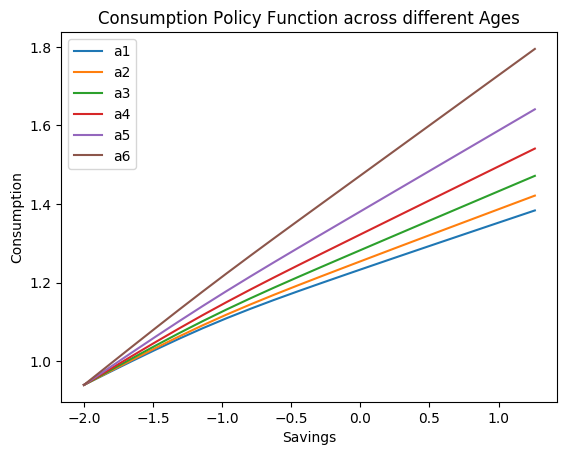

PyObject <matplotlib.text.Text object at 0x000000002BB49DD8>

In [54]:
# Plot consumption policy function with different ages


dr_a1 = Dolo.tabulate(model, dr, :s, s0, 10) # second income value  -age 1
dr_a2 = Dolo.tabulate(model, dr, :s, s0, 11) # second income value  -age 2
dr_a3 = Dolo.tabulate(model, dr, :s, s0, 12) # second  income value  -age 3
dr_a4 = Dolo.tabulate(model, dr, :s, s0, 13) # second  income value  -age 4
dr_a5 = Dolo.tabulate(model, dr, :s, s0, 14) # second  income value  -age 5
dr_a6 = Dolo.tabulate(model, dr, :s, s0, 15) # second  income value  -age 6

c_y1=exp(ygrid[2])+dr_a1[:s]*r-dr_a1[Axis{:V}(:a)]
c_y2=exp(ygrid[2])+dr_a2[:s]*r-dr_a2[Axis{:V}(:a)]
c_y3=exp(ygrid[2])+dr_a3[:s]*r-dr_a3[Axis{:V}(:a)]
c_y4=exp(ygrid[2])+dr_a4[:s]*r-dr_a4[Axis{:V}(:a)]
c_y5=exp(ygrid[2])+dr_a5[:s]*r-dr_a5[Axis{:V}(:a)]
c_y6=exp(ygrid[2])+dr_a6[:s]*r-dr_a6[Axis{:V}(:a)]
c_y7=exp(ygrid[2])+dr_a7[:s]*r-dr_a7[Axis{:V}(:a)]


plt.plot(dr_a1[Axis{:V}(:s)][1:end_y],c_y1[1:end_y], label="a1")
plt.plot(dr_a2[Axis{:V}(:s)][1:end_y],c_y2[1:end_y], label="a2")
plt.plot(dr_a3[Axis{:V}(:s)][1:end_y],c_y3[1:end_y], label="a3")
plt.plot(dr_a4[Axis{:V}(:s)][1:end_y],c_y4[1:end_y], label="a4")
plt.plot(dr_a5[Axis{:V}(:s)][1:end_y],c_y5[1:end_y], label="a5")
plt.plot(dr_a6[Axis{:V}(:s)][1:end_y],c_y6[1:end_y], label="a6")
plt.legend()
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different Ages")

Simulate the model.

In [38]:
T=10
hor=linspace(1,T,T)
mc_ar=model.exogenous
sim_armc = Dolo.simulate(model,dr,mc_ar;N=100,T=10);


 Set-up the life-status and earnings path for the agents

In [39]:
function get_index(ind::Float64,N_age::Int64,Ny::Int64)
    i_y=cld(ind,N_age)

  if rem(ind,N_age)==0
    i_a=N_age
  else 
    i_a=rem(ind,N_age)
  end 
  return i_y,i_a
end

get_index (generic function with 1 method)

 in module Main at In[14]:2 overwritten at In[39]:2.


In [40]:
N=100
T=10
ygrid=[-0.0968141 -0.0580885 -0.0193628 0.0193628 0.0580885 0.0968141]
life_grid=ones(9)
life_grid[9]=0.0
income_path=zeros(T,N)
life_status=zeros(T,N)
Tot_states=54.0 #(9 ages * 6 income states)
for j=1:N
    for i=1:T
       state=sim_armc[Axis{:N}(j), Axis{:V}(:mc_process)][i]
       state_y,state_a=get_index(state,9,6)
        state_y=convert(Int64,state_y)
         state_a=convert(Int64,state_a)
       income_path[i,j]=exp(ygrid[state_y])
       life_status[i,j]=life_grid[state_a]

    end
end

Plot the life-cycle consumption and income profile for one agent.

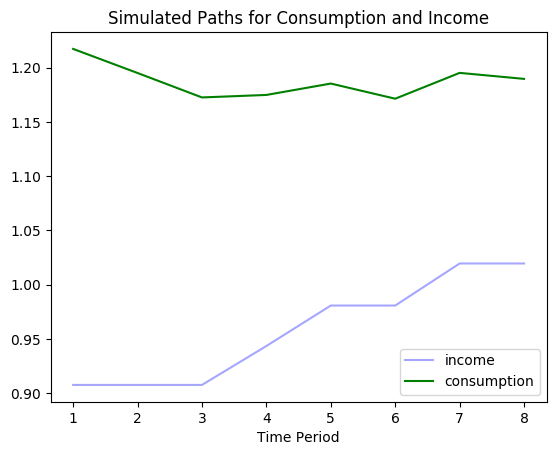

PyObject <matplotlib.text.Text object at 0x000000002A56CA58>

In [41]:
# Pick an agent from the simulation: 
import PyPlot
plt=PyPlot
j=7
t_death=maximum(find(income_path[:,j]))
horizon=t_death-2
hor_alive=linspace(1,horizon,horizon)

c=(income_path[1:horizon,j]+sim_armc[Axis{:N}(j), Axis{:V}(:s)][1:horizon]*r-sim_armc[Axis{:N}(j), Axis{:V}(:a)][1:horizon]).*life_status[1:horizon,j]
plt.plot(hor_alive, income_path[1:horizon,j].*life_status[1:horizon,j], color="blue", alpha=0.35, label="income")
plt.plot(hor_alive, c, color="green",label="consumption")
plt.legend()
plt.xlabel("Time Period")
plt.title("Simulated Paths for Consumption and Income")